In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
%pip install ohmeow-blurr -q

     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 2.8 MB 38.6 MB/s 
     |████████████████████████████████| 264 kB 48.5 MB/s 
     |████████████████████████████████| 186 kB 48.8 MB/s 
     |████████████████████████████████| 1.2 MB 38.2 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 3.3 MB 39.5 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 895 kB 37.4 MB/s 
     |████████████████████████████████| 636 kB 30.7 MB/s 
     |████████████████████████████████| 243 kB 51.3 MB/s 
     |████████████████████████████████| 119 kB 52.3 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 301 kB/s 


In [ ]:
from transformers import *
from fastai.text.all import *

from blurr.utils import *
from blurr.data.core import *
from blurr.modeling.core import *

## Load the data

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)

In [ ]:
path.ls()

(#1) [Path('/root/.fastai/data/imdb_sample/texts.csv')]

In [ ]:
df = pd.read_csv(path/'texts.csv')

In [ ]:
df.head()

,label,text,is_valid
0,negative,"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!",False
1,positive,"This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is som...",False
2,negative,"Every once in a long while a movie will come along that will be so awful that I feel compelled to warn people. If I labor all my days and I can save but one soul from watching this movie, how great will be my joy.<br /><br />Where to begin my discussion of pain. For starters, there was a musical montage every five minutes. There was no character development. Every character was a stereotype. We had swearing guy, fat guy who eats donuts, goofy foreign guy, etc. The script felt as if it were being written as the movie was being shot. The production value was so incredibly low that it felt li...",False
3,positive,"Name just says it all. I watched this movie with my dad when it came out and having served in Korea he had great admiration for the man. The disappointing thing about this film is that it only concentrate on a short period of the man's life - interestingly enough the man's entire life would have made such an epic bio-pic that it is staggering to imagine the cost for production.<br /><br />Some posters elude to the flawed characteristics about the man, which are cheap shots. The theme of the movie ""Duty, Honor, Country"" are not just mere words blathered from the lips of a high-brassed offic...",False
4,negative,"This movie succeeds at being one of the most unique movies you've seen. However this comes from the fact that you can't make heads or tails of this mess. It almost seems as a series of challenges set up to determine whether or not you are willing to walk out of the movie and give up the money you just paid. If you don't want to feel slighted you'll sit through this horrible film and develop a real sense of pity for the actors involved, they've all seen better days, but then you realize they actually got paid quite a bit of money to do this and you'll lose pity for them just like you've alr...",False


In [ ]:
model_cls = AutoModelForSequenceClassification

In [ ]:
print(BLURR.get_architectures())

['albert', 'albert_fast', 'bart', 'bart_fast', 'barthez', 'barthez_fast', 'beit', 'bert', 'bert_fast', 'bert_generation', 'bert_japanese', 'bertweet', 'big_bird', 'big_bird_fast', 'bigbird_pegasus', 'blenderbot', 'blenderbot_small', 'byt5', 'camembert', 'camembert_fast', 'canine', 'clip', 'clip_fast', 'convbert', 'convbert_fast', 'cpm', 'ctrl', 'deberta', 'deberta_fast', 'deberta_v2', 'deit', 'detr', 'distilbert', 'distilbert_fast', 'dpr', 'dpr_fast', 'electra', 'electra_fast', 'encoder_decoder', 'flaubert', 'fsmt', 'funnel', 'funnel_fast', 'gpt2', 'gpt2_fast', 'gpt_neo', 'herbert', 'herbert_fast', 'hubert', 'ibert', 'layoutlm', 'layoutlm_fast', 'layoutlmv2', 'layoutlmv2_fast', 'led', 'led_fast', 'longformer', 'longformer_fast', 'luke', 'lxmert', 'lxmert_fast', 'm2m_100', 'marian', 'mbart', 'mbart50', 'mbart50_fast', 'mbart_fast', 'megatron_bert', 'mmbt', 'mobilebert', 'mobilebert_fast', 'mpnet', 'mpnet_fast', 'mt5', 'openai', 'openai_fast', 'pegasus', 'pegasus_fast', 'phobert', 'proph

In [ ]:
pretrained_model_name = 'distilroberta-base'

In [ ]:
doc(BLURR.get_hf_objects)

In [ ]:
num_labels = 2
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR.get_hf_objects(pretrained_model_name, model_cls=model_cls, config_kwargs={'num_labels': num_labels})

In [ ]:
print(hf_arch)
print(type(hf_config))
print(type(hf_tokenizer))
print(type(hf_model))

roberta
<class 'transformers.models.roberta.configuration_roberta.RobertaConfig'>
<class 'transformers.models.roberta.tokenization_roberta_fast.RobertaTokenizerFast'>
<class 'transformers.models.roberta.modeling_roberta.RobertaForSequenceClassification'>


In [ ]:
print(hf_config)

RobertaConfig {
  "_name_or_path": "distilroberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.10.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}



## DataBlock API

In [ ]:
doc(HF_TextBlock)

In [ ]:
blocks = (HF_TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model, ),
          CategoryBlock)
dblock = DataBlock(blocks=blocks, 
                   get_x=ColReader('text'), 
                   get_y=ColReader('label'), 
                   splitter=ColSplitter(col='is_valid')
                   )

HF_BeforeBatchTransforms gives for each sample input_ids (padding), attention_mask

In [ ]:
dblock.summary(df)

Setting-up type transforms pipelines
0    negative  ...    False
1    positive  ...    False
2    negative  ...    False
3    positive  ...    False
4    negative  ...    False
..        ...  ...      ...
995  negative  ...     True
996  positive  ...     True
997  negative  ...     True
998  negative  ...     True
999  positive  ...     True

[1000 rows x 3 columns]
Found 1000 items
2 datasets of sizes 800,200
Setting up Pipeline: ColReader -- {'cols': 'text', 'pref': '', 'suff': '', 'label_delim': None}
Setting up Pipeline: ColReader -- {'cols': 'label', 'pref': '', 'suff': '', 'label_delim': None} -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: ColReader -- {'cols': 'text', 'pref': '', 'suff': '', 'label_delim': None}
    starting from
      label                                                                                                                                                                                               

In [ ]:
dls = dblock.dataloaders(source=df, verbose=True, bs=4)

0    negative  ...    False
1    positive  ...    False
2    negative  ...    False
3    positive  ...    False
4    negative  ...    False
..        ...  ...      ...
995  negative  ...     True
996  positive  ...     True
997  negative  ...     True
998  negative  ...     True
999  positive  ...     True

[1000 rows x 3 columns]
Found 1000 items
2 datasets of sizes 800,200
Setting up Pipeline: ColReader -- {'cols': 'text', 'pref': '', 'suff': '', 'label_delim': None}
Setting up Pipeline: ColReader -- {'cols': 'label', 'pref': '', 'suff': '', 'label_delim': None} -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: HF_BeforeBatchTransform
Setting up after_batch: Pipeline: HF_AfterBatchTransform


In [ ]:
b = dls.one_batch()

In [ ]:
len(b), type(b[0]), type(b[1])

(2,
 dict,
 fastai.torch_core.TensorCategory,
 {'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'),
  'input_ids': tensor([[    0,  4833,  3009,  ...,  1916,     6,     2],
          [    0,   978,    14,  ..., 38954, 18281,     2],
          [    0,  2647,     6,  ...,     7,    69,     2],
          [    0,    22, 15833,  ...,    15,    10,     2]], device='cuda:0')})

In [ ]:
b[0]

{'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'),
 'input_ids': tensor([[    0,  4833,  3009,  ...,  1916,     6,     2],
         [    0,   978,    14,  ..., 38954, 18281,     2],
         [    0,  2647,     6,  ...,     7,    69,     2],
         [    0,    22, 15833,  ...,    15,    10,     2]], device='cuda:0')}

In [ ]:
dls.show_batch(dataloaders=dls, max_n=2, trunc_at=500)

,text,target
0,"Raising Victor Vargas: A Review<br /><br />You know, Raising Victor Vargas is like sticking your hands into a big, steaming bowl of oatmeal. It's warm and gooey, but you're not sure if it feels right. Try as I might, no matter how warm and gooey Raising Victor Vargas became I was always aware that something didn't quite feel right. Victor Vargas suffers from a certain overconfidence on the director's part. Apparently, the director thought that the ethnic backdrop of a Latino family on the lower",negative
1,"The year 2005 saw no fewer than 3 filmed productions of H. G. Wells' great novel, ""War of the Worlds"". This is perhaps the least well-known and very probably the best of them. No other version of WotW has ever attempted not only to present the story very much as Wells wrote it, but also to create the atmosphere of the time in which it was supposed to take place: the last year of the 19th Century, 1900 using Wells' original setting, in and near Woking, England.<br /><br />IMDb seems unfriendly",positive


## Training

In [ ]:
doc(HF_BaseModelWrapper)

In [ ]:
model = HF_BaseModelWrapper(hf_model)

In [ ]:
doc(Learner)

In [ ]:
#del learn

In [ ]:
learn = Learner(dls, model, 
                opt_func=partial(OptimWrapper, opt=torch.optim.Adam), #partial(Adam)
                loss_func=CrossEntropyLossFlat(), 
                metrics=[accuracy], 
                cbs=[HF_BaseModelCallback], 
                splitter=hf_splitter).to_fp16()
learn.freeze()

In [ ]:
#learn.summary() #Q: What is the purpose of HF_BaseModelWrapper, HF_BaseModelCallback, hf_splitter

In [ ]:
print(len(learn.opt.param_groups))

3


SuggestedLRs(minimum=1.0964781722577755e-07, steep=0.033113110810518265, valley=0.0005754399462603033, slide=0.0020892962347716093)

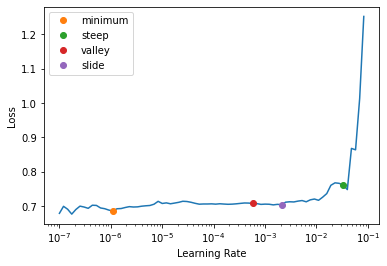

In [ ]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [ ]:
learn.fit_one_cycle(3, lr_max=slice(5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.706078,0.692356,0.490000,01:11
1,0.694096,0.687766,0.535000,01:11
2,0.687647,0.687146,0.535000,01:11


In [ ]:
learn.unfreeze()

SuggestedLRs(minimum=0.03019951581954956, steep=0.25118863582611084, valley=1.737800812406931e-05, slide=0.2089296132326126)

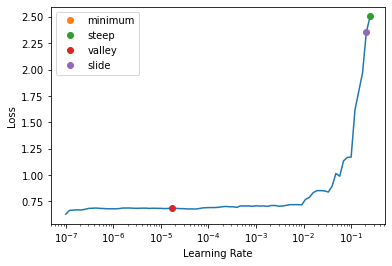

In [ ]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [ ]:
learn.fit_one_cycle(2, lr_max=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.589672,0.487191,0.775000,01:36
1,0.382374,0.431692,0.820000,01:36


In [ ]:
learn.show_results(learner=learn, max_n=3, trunc_at=500)

,text,target,prediction
0,"The trouble with the book, ""Memoirs of a Geisha"" is that it had Japanese surfaces but underneath the surfaces it was all an American man's way of thinking. Reading the book is like watching a magnificent ballet with great music, sets, and costumes yet performed by barnyard animals dressed in those costumesso far from Japanese ways of thinking were the characters.<br /><br />The movie isn't about Japan or real geisha. It is a story about a few American men's mistaken ideas about Japan and geish",negative,negative
1,"<br /><br />I'm sure things didn't exactly go the same way in the real life of Homer Hickam as they did in the film adaptation of his book, Rocket Boys, but the movie ""October Sky"" (an anagram of the book's title) is good enough to stand alone. I have not read Hickam's memoirs, but I am still able to enjoy and understand their film adaptation. The film, directed by Joe Johnston and written by Lewis Colick, records the story of teenager Homer Hickam (Jake Gyllenhaal), beginning in October of 195",positive,positive
2,"How viewers react to this new ""adaption"" of Shirley Jackson's book, which was promoted as NOT being a remake of the original 1963 movie (true enough), will be based, I suspect, on the following: those who were big fans of either the book or original movie are not going to think much of this one...and those who have never been exposed to either, and who are big fans of Hollywood's current trend towards ""special effects"" being the first and last word in how ""good"" a film is, are going to love it.",negative,negative


## Prediction

In [ ]:
learn.blurr_predict("excellent movie, loved the whole plot")

[(('positive',), (#1) [tensor(1)], (#1) [tensor([0.0640, 0.9360])])]

In [ ]:
learn.blurr_predict(["the movie plot has lot of holes in it, hated the songs", "excellent movie, loved the whole plot"])

[(('negative',), (#1) [tensor(0)], (#1) [tensor([0.9270, 0.0730])]),
 (('positive',), (#1) [tensor(1)], (#1) [tensor([0.0640, 0.9360])])]